<center><a href="https://sites.google.com/fat.uerj.br/livia/"> <img src="../images/capa2.png" alt="Header" style="width: 800px;"/> </a></center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vnikoofard/DeepLearningTF/blob/main/Notebooks/04b_asl_predictions.ipynb)

# Implantando seu modelo (*Deploying*)
Agora que temos um modelo bem treinado, é hora de usá-lo. Neste exercício, vamos expor novas imagens ao nosso modelo e detectar as letras corretas do alfabeto da língua de sinais. Vamos começar!

## Objetivos

* Carregue um modelo já treinado do disco
* Reformatar imagens para um modelo treinado em imagens de um formato diferente
* Realize inferência com novas imagens, nunca vistas pelo modelo treinado e avalie seu desempenho

## Carregando o Modelo
Agora que estamos em um novo notebook, vamos carregar o modelo salvo que treinamos. Nosso salvamento do exercício anterior criou uma pasta chamada "asl_model". Podemos carregar o modelo selecionando a mesma pasta.

In [ ]:
from tensorflow import keras

model = keras.models.load_model('asl_model')

Se quiser ter certeza de que tudo está intacto, você pode ver o resumo do modelo novamente.

In [ ]:
model.summary()

## Preparando uma imagem para o modelo

Agora é hora de usar o modelo para fazer previsões sobre novas imagens que nunca foram vistas antes. Isso também é chamado de inferência. Fornecemos a você um conjunto de imagens na pasta data/asl_images. Tente abri-lo usando a navegação à esquerda e explore as imagens.

Você notará que as imagens que temos têm uma resolução muito maior do que as imagens em nosso conjunto de dados. Eles também são coloridos. Lembre-se de que nossas imagens no conjunto de dados tinham 28x28 pixels e tons de cinza. É importante ter em mente que sempre que você fizer previsões com um modelo, a entrada deve corresponder à forma dos dados nos quais o modelo foi treinado. Para este modelo, o conjunto de dados de treinamento tinha a forma: (27455, 28, 28, 1). Isso correspondeu a 27455 imagens de 28 por 28 pixels cada uma com um canal de cor (escala de cinza).

### Mostrando as Imagens

Quando usamos nosso modelo para fazer previsões sobre novas imagens, será útil mostrar a imagem também. Podemos usar a biblioteca matplotlib para fazer isso.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

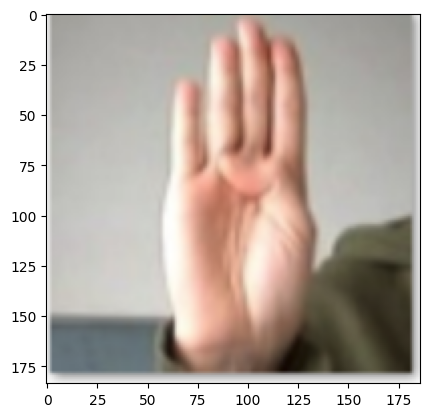

In [10]:
import sys

if "google.colab" in sys.modules:
    %pip install wget
    import wget
    image_url_1 = 'https://github.com/vnikoofard/DeepLearningTF/blob/main/data/asl_images/b.png'
    image_url_2 = 'https://github.com/vnikoofard/DeepLearningTF/blob/main/data/asl_images/a.png'
    wget.download(image_url_1, 'b.png')
    wget.download(image_url_2, 'a.png')
    show_image('b.png')

else:
    show_image('../data/asl_images/b.png')

### Dimensionando as Imagens

As imagens em nosso conjunto de dados tinham 28x28 pixels e tons de cinza. Precisamos ter certeza de passar o mesmo tamanho e imagens em tons de cinza para o nosso método de previsão. Existem algumas maneiras de editar imagens com Python, mas o Keras possui um utilitário integrado que funciona bem.

In [ ]:
from tensorflow.keras.preprocessing import image as image_utils

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image

In [ ]:
image = load_and_scale_image('data/asl_images/b.png')
plt.imshow(image, cmap='gray')

### Preparando a imagem para previsão

Agora que temos uma imagem em escala de cinza de 28 x 28 pixels, estamos quase prontos para passá-la para nosso modelo para previsão. Primeiro, precisamos remodelar nossa imagem para corresponder à forma do conjunto de dados no qual o modelo foi treinado. Antes de podermos remodelar, precisamos converter nossa imagem em um formato mais rudimentar. Faremos isso com um utilitário keras chamado image_to_array.

In [ ]:
image = image_utils.img_to_array(image)

Agora podemos remodelar nossa imagem para prepará-la para previsão.

In [ ]:
# Este reshape corresponde a 1 imagem de 28x28 pixels com um canal de cor
image = image.reshape(1,28,28,1) 

Finalmente, devemos lembrar de normalizar nossos dados (tornando todos os valores entre 0-1), como fizemos com nosso dataset de treinamento:

In [ ]:
image = image / 255

## Fazendo previsões 
Ok, agora estamos prontos para prever! Isso é feito passando a imagem pré-processada para o método de previsão do modelo.

In [ ]:
prediction = model.predict(image)
print(prediction)

### Compreendendo a previsão

As previsões estão no formato de uma matriz de 24 comprimentos. Embora pareça um pouco diferente, este é o mesmo formato de nossas matrizes categóricas "binarizadas" de y_train e y_test. Cada elemento da matriz é uma probabilidade entre 0 e 1, representando a confiança para cada categoria. Vamos torná-lo um pouco mais legível. Podemos começar descobrindo qual elemento da matriz representa a maior probabilidade. Isso pode ser feito facilmente com a biblioteca numpy e a função [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [ ]:
import numpy as np
np.argmax(prediction)

Cada elemento da matriz de predição representa uma possível letra do alfabeto da língua de sinais. Lembre-se de que j e z não são opções porque envolvem mover a mão e estamos lidando apenas com fotos estáticas. Vamos criar um mapeamento entre o índice da matriz de previsões e a letra correspondente.

In [ ]:
# O alfabeto não contém j ou z porque eles exigem movimento
alphabet = "abcdefghiklmnopqrstuvwxy"

Agora podemos passar nosso índice de previsão para encontrar a letra correspondente.

In [ ]:
alphabet[np.argmax(prediction)]

## Exercício: Junte tudo

Vamos colocar tudo em uma função para que possamos fazer previsões apenas a partir do arquivo de imagem. Implemente-o na função abaixo usando as funções e etapas acima. Se precisar de ajuda, você pode revelar a solução clicando nos três pontos abaixo.

In [ ]:
def predict_letter(file_path):
    # Show image
    FIXME
    # Load and scale image
    image = FIXME
    # Convert to array
    image = FIXME
    # Reshape image
    image = FIXME
    # Normalize image
    image = FIXME
    # Make prediction
    prediction = FIXME
    # Convert prediction to letter
    predicted_letter = FIXME
    # Return prediction
    return predicted_letter   

## Solução

Clique no '...' abaixo para ver a solução.

In [ ]:
# SOLUTION
def predict_letter(file_path):
    show_image(file_path)
    image = load_and_scale_image(file_path)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,28,28,1) 
    image = image/255
    prediction = model.predict(image)
    # convert prediction to letter
    predicted_letter = alphabet[np.argmax(prediction)]
    return predicted_letter

In [ ]:
predict_letter("data/asl_images/b.png")

Vamos também usar a função com a letra 'a' no conjunto de dados asl_images:

In [ ]:
predict_letter("data/asl_images/a.png")

## Resumo

Ótimo trabalho nesses exercícios! Você passou por todo o processo de treinamento de um modelo altamente preciso desde o início e, em seguida, usou o modelo para fazer previsões novas e valiosas. Se você tiver algum tempo, nós encorajamos você a tirar fotos com sua webcam, carregá-las na pasta data/asl_images e testar o modelo nelas. Para Mac, você pode usar o Photo Booth. No Windows, você pode selecionar o aplicativo Câmera na tela inicial. Esperamos que você experimente. É uma boa oportunidade para aprender um pouco de língua de sinais! Por exemplo, experimente as letras do seu nome.

Podemos imaginar como esse modelo poderia ser usado em um aplicativo para ensinar a língua de sinais a alguém, ou mesmo ajudar alguém que não sabe falar a interagir com um computador. Se você estiver familiarizado com o desenvolvimento da Web, os modelos podem até ser usados no navegador com uma biblioteca chamada [TensorFlow.js](https://www.tensorflow.org/js).

### Resetar o ambiente
Antes de prosseguir, execute a célula a seguir para resetar o ambiente. Isso é necessário para passar para o próximo notebook.

In [ ]:
import os
os._exit(00)

## Next

Esperamos que você tenha gostado desses exercícios. Nas próximas seções, aprenderemos como aproveitar o aprendizado profundo quando não tivermos um conjunto de dados robusto disponível. Vejo você lá!
Para aprender mais sobre inferência na borda, confira [este belo artigo](http://web.eecs.umich.edu/~mosharaf/Readings/FB-ML-Edge.pdf) sobre o tópico.

Agora que estamos familiarizados com a construção de seus próprios modelos e entendemos como eles funcionam, voltaremos nossa atenção para a técnica muito poderosa de usar modelos pré-treinados para agilizar seu trabalho.